# Deep Language Models

In [1]:
import numpy as np
import pandas as pd
from project import data_pre_processing as ng
import time
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline

In [2]:
data_path = 'project/data/'
results_path = 'project/results/'

In [3]:
# load data files
trn_n_gram_to_freq = dict(pd.read_hdf(data_path + 'trn_n_gram_to_freq.hdf5'))
vldn_n_gram_to_freq = dict(pd.read_hdf(data_path + 'vldn_n_gram_to_freq.hdf5'))
trn_n_gram_to_id = dict(pd.read_hdf(data_path + 'trn_n_gram_to_id.hdf5'))
vldn_n_gram_to_id = dict(pd.read_hdf(data_path + 'vldn_n_gram_to_id.hdf5'))

0 *t*-1 . END
$ UNK million *u*
said 0 *t*-1 .
million *u* . END
, '' says *t*-1
million *u* , or
0 *t*-2 . END
a share . END
the company said 0
, '' said *t*-1
said 0 *t*-2 .
new york stock exchange
*u* a share ,
billion *u* . END
said *t*-1 . END
UNK million *u* ,
said 0 it will
and chief executive officer
new york . END
, the company said
the new york stock
says *t*-1 . END
cents a share .
$ UNK *u* a
*u* , or $
says 0 *t*-1 ,
UNK *u* a share
, for example ,
cents a share ,
, '' he said
president and chief executive
in september . END
the u.s. . END
at $ UNK *u*
company said 0 it
$ UNK billion *u*
, said 0 the
0 *t*-1 , the
UNK . '' END
year earlier . END
0 *t*-3 . END
*u* a share .
START the company said
, he said 0
$ UNK *u* ,
START in addition ,
corp. said 0 it
million *u* from $
said 0 *t*-1 ,
the company . END


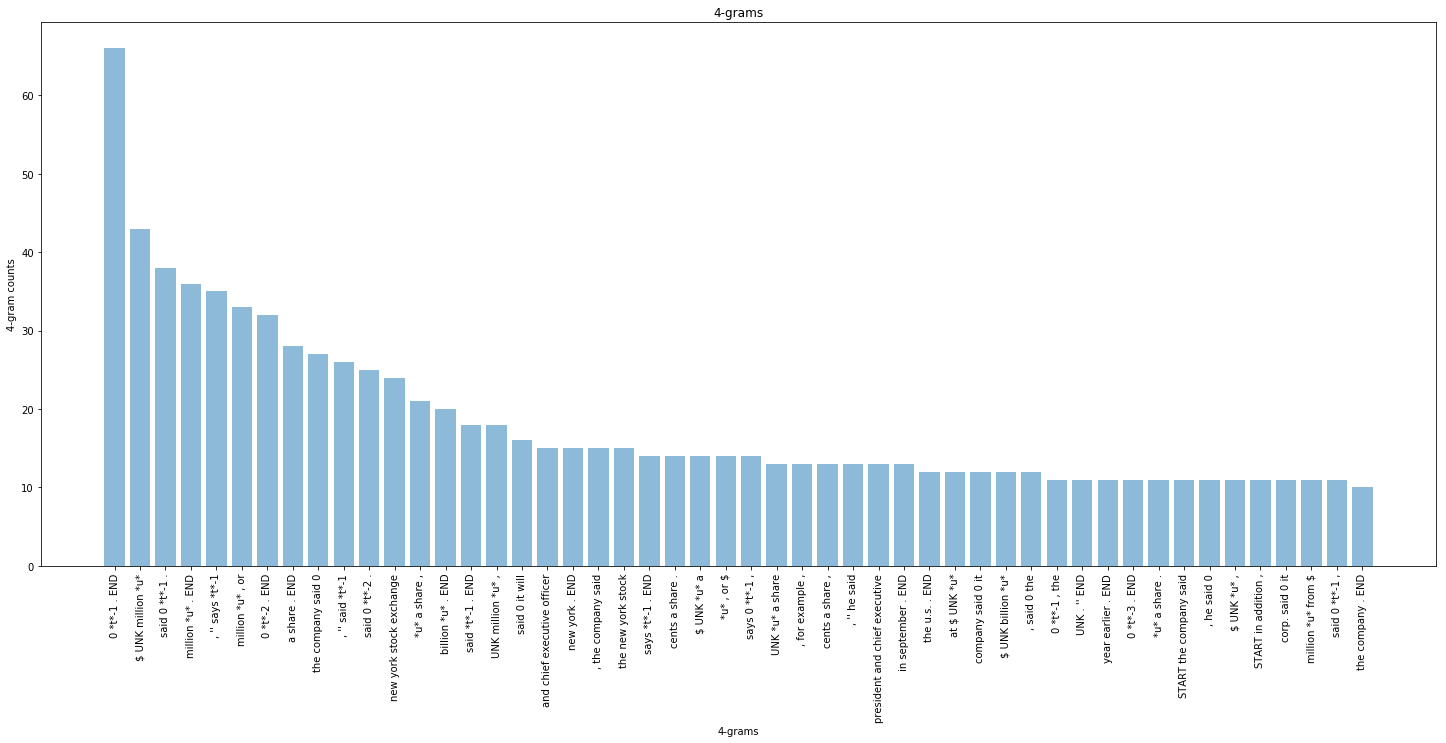

In [9]:
# sort and plot n-grams as histograms
sorted_n_grams = ng.sort_by_values(dict=trn_n_gram_to_freq)
plot_histogram(4, sorted_n_grams, trn_n_gram_to_id, top_n_count=50)

In [ ]:
# generating

### Helper Functions

In [4]:
def save_as_hdf5(path, ds_name, ds):
    hdf = pd.HDFStore(path)
    hdf[ds_name] = ds

In [8]:
def plot_histogram(n, sorted_freq_vec, id_map, top_n_count=None):
    x = []
    y = []
    counter = 0
    if top_n_count is None:
        top_n_count = len(sorted_freq_vec)
    for ele in reversed(sorted_freq_vec):
        id = id_map.get(ele[0])
        x.append(ele[0])
        print(ele[0])
        y.append(int(ele[1]))
        counter += 1
        if counter == top_n_count:
            break
            
    # matplotlib.rcParams.update({'font.size': 18})
    x_ticks = np.arange(len(x))
    plt.figure(figsize=(25,10))
    plt.bar(x_ticks,y,align='center', alpha=0.5)
    plt.xticks(x_ticks, tuple(x), rotation=90)
    plt.ylabel(str(n) +  "-gram counts")
    plt.xlabel(str(n) + "-grams")
    plt.title(str(n) + "-grams")
    plt.show()